#주성분 분석
###IT융합자율학부 201814076 권혁준

###차원 dimension
- 데이터 샘플을 표현하는 특성의 개수
- n 차원 데이터
 - 특성이 n개인 데이터
 - n차원 공간 상의 한 점
- 데이터 예시
 - 생선 데이터
    - 길이, 무게, 높이, 대각선 길이, 두께
  - 와인 데이터
    - (도수,당도,pH) -> 3차원 공간의 한 점
  - 과일 사진 데이터
    - 100x100 픽셀 -> 10,000차원 공간의 한 점










###다차원 배열 multi-demensional array
- 다차원 배열에서는 축의 수를 차원으로 표현
 - 데이터를 저장하는 형태로 이해
- 1차원 배열(벡터 vector)
  - n차원 벡터?
    - 원소의 개수가 n인1차원 배열
    - 크기가 n인 벡터
- 2차원 배열(행렬 matrix)
- 3차원 배열(텐서 tensor)
- n차원 배열(텐서 tensor)

###차원의 저주 curse of dimension
- 입력 데이터의 수보다 데이터의 차원이 큰 경우
- 데이터가 있는 공간의 차원은 매우 크지만 데이터가 공간 안에 흩뿌려져 있는 상황
 - 모델의 복잡도가 증가하여 과대적합으로 모델의 예측 성능이 낮아짐
- 특성이 10,000개인 300개의 과일 사진

###차원 축소 dimension reduction
- 고차원 데이터로부터 저차원 데이터로 변환하는 방법으로 대표적인 비지도 학습 모델
  - PCA, LDA, ICA, SVD, NMF 등의 모델이 있음
- 데이터를 잘 나타내는 일부 특성을 선택하여 데이터의 크기를 줄이는 작업
- 차원을 축소하여 다른 지도 학습, 비지도 학습 모델과 결합하여 사용

##주 성분 분석 PCA (principal Component Analysis)
- 데이터에 있는 분산이 큰 방향을 찾는 방법
-분산
  - 데이터가 널리 퍼져있는 정도
  - 분산이 큰 방향이라는건 데이터를 잘 표현하는 벡터를 의미
- 주 성분 (principal component)
  - 데이터를 잘 표현하는 (원점을 지나는)벡터
    - 원본 데이터로부터 얻은 공분산 행렬의 고유벡터이며 고유값이 클 수록 데이터를 잘 표현함
    - 사이킷런은 PCA 모델을 학습할 때 특성마다 평균값을 빼서 자동으로 원점에 맞춰 줌
  - 원본 데이터의 특성 개수만큼 주성분 벡터를 찾을 수 있음
    - 원본 데이터의 특성 개수와 샘플 개수 중 작은 값만큼 찾을 수 있음
    - 첫번째 주성분, 두번째 주성분 ...
  - 주 성분 벡터의 원소 개수는 원본 데이터의 특성 개수와 일치
  - 주 성분 벡터는 서로 수직인 관계

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-11-03 09:31:44--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-11-03 09:31:44--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-11-03 09:31:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

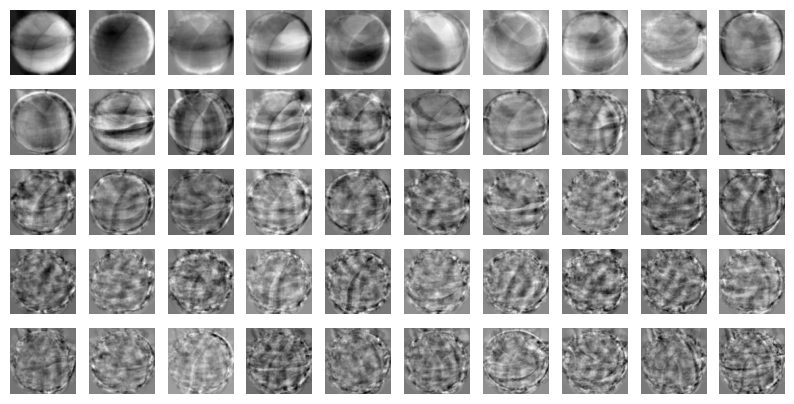

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


##원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


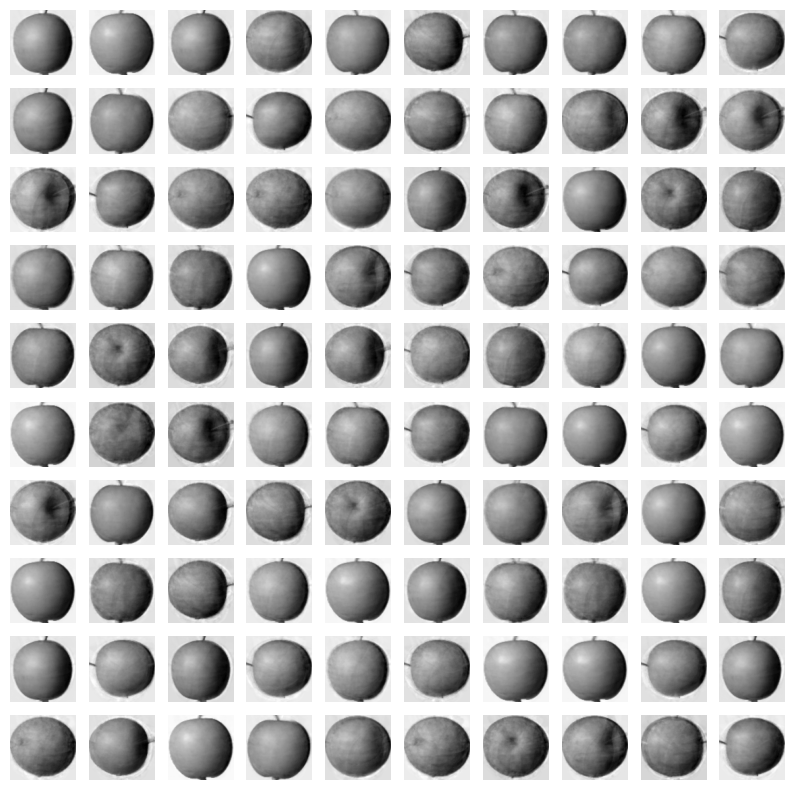

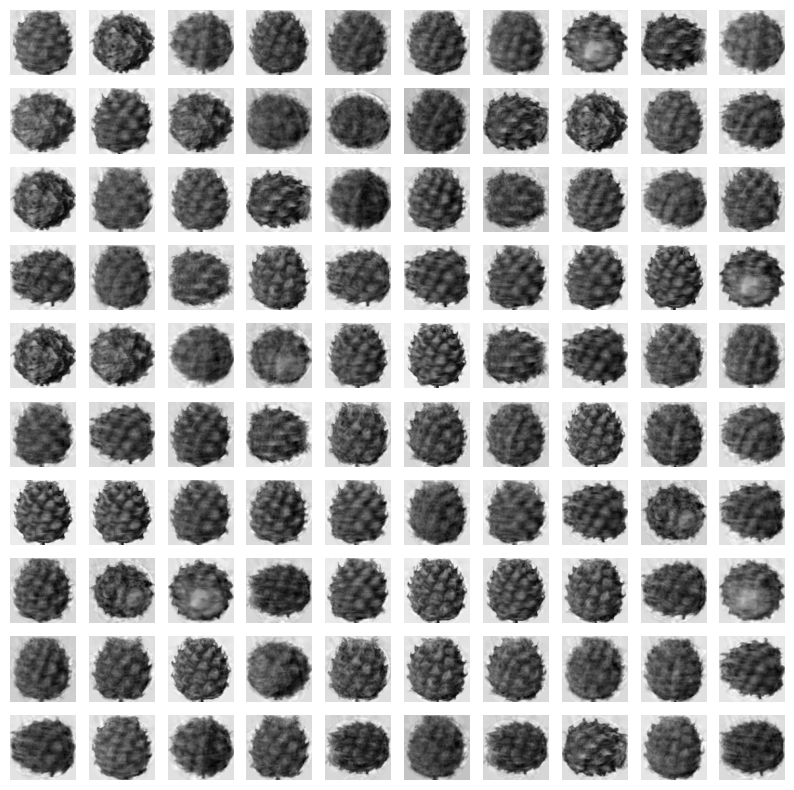

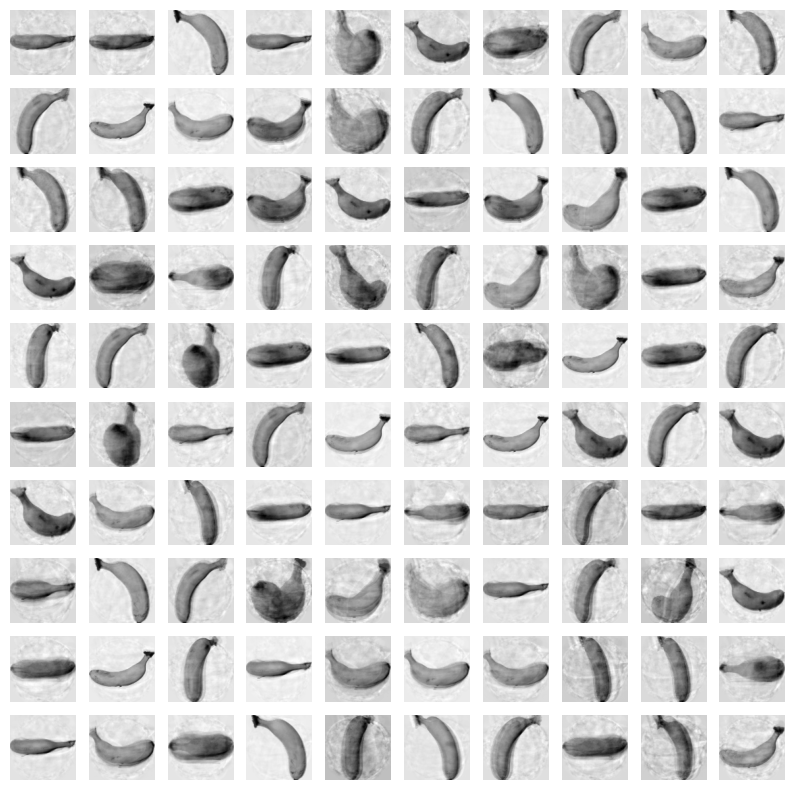

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

##설명된 분산 (explained_variance)
- 설명된 분산
  - 원본 데이터의 분산을 주 성분이 얼마나 잘 나타내는지를 기록한 값
- PCA 클래스
  - explained_variance_ratio_
    - 각 주성분의 설명된 분산 비율이 저장
    - 플롯하여 적절한 주성분의 개수를 찾는데 활용

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215742972759656


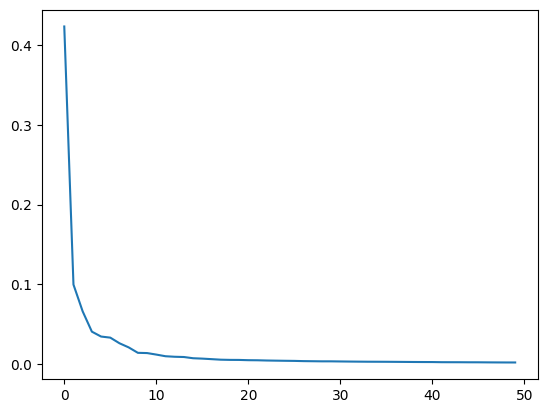

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

##다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.058342695236206


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.023802661895751955


In [ ]:
pca = PCA(n_components=0.5) #주 성분의 개수 또는 설명된 분산 비율
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03362364768981933


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


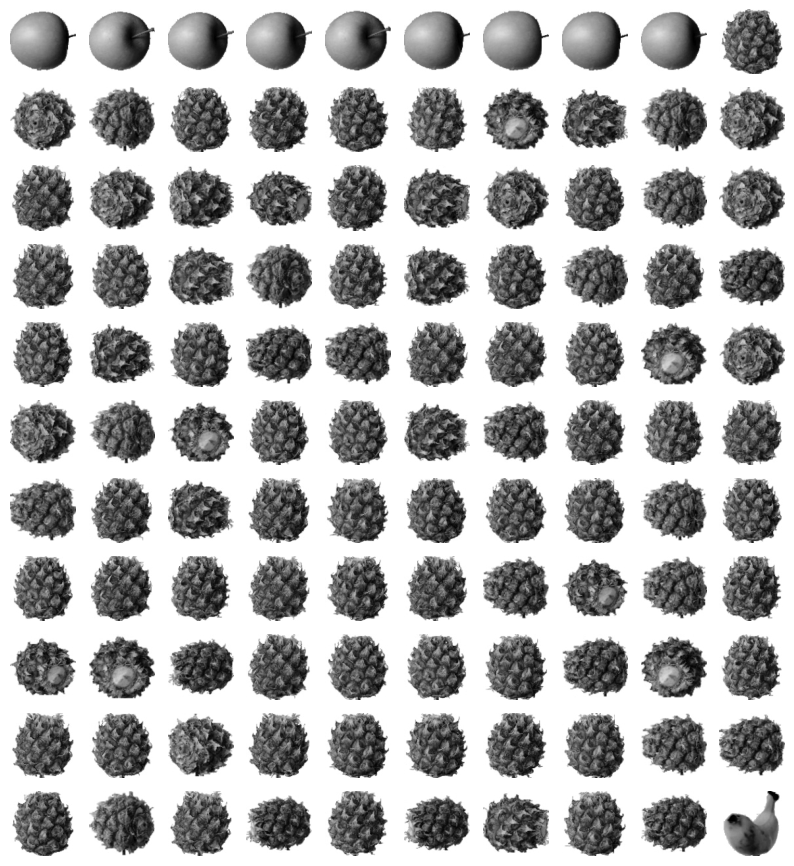

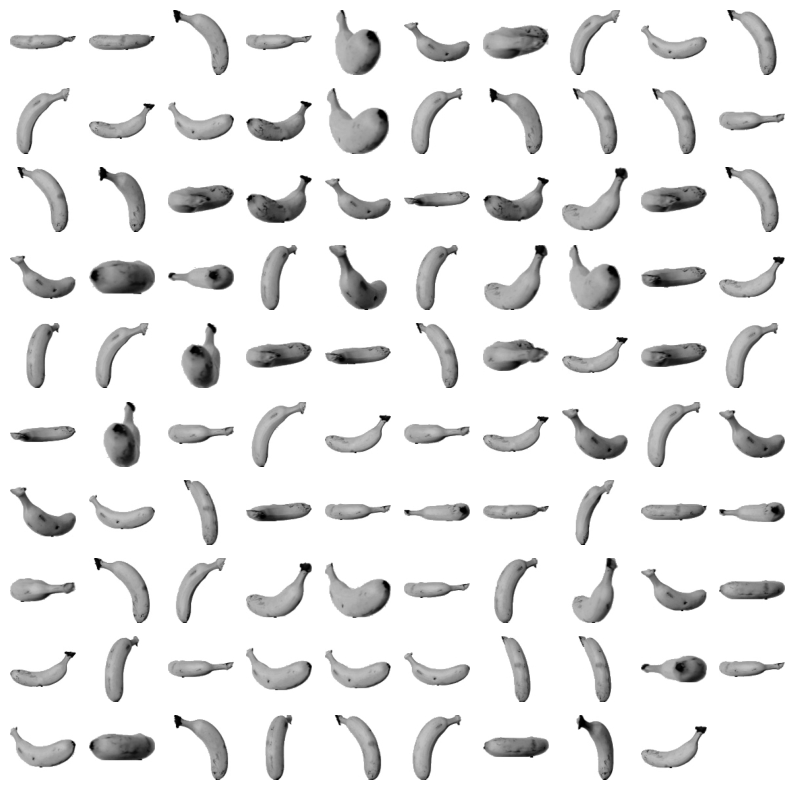

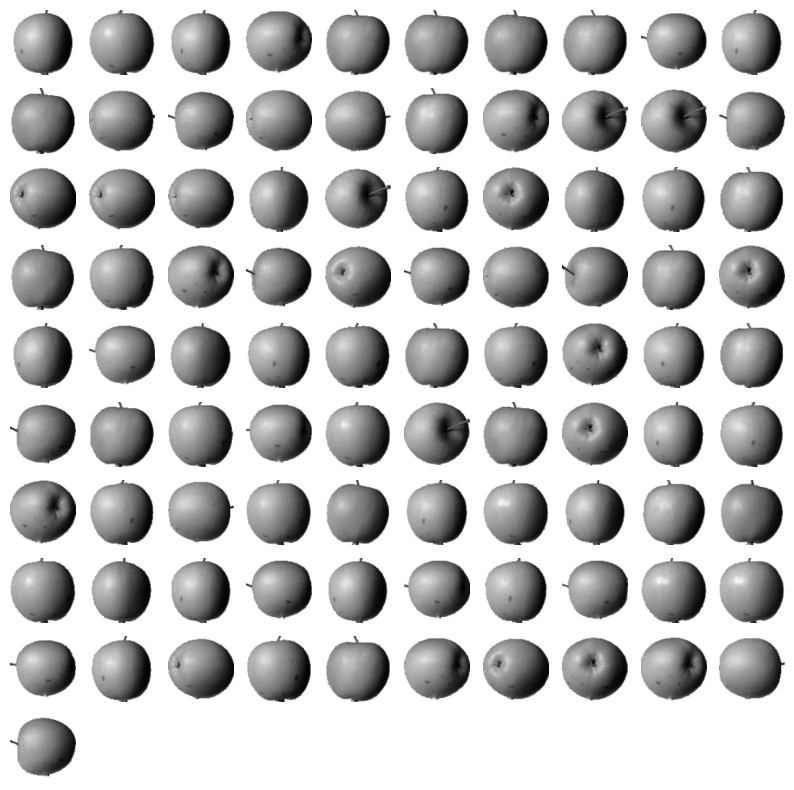

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

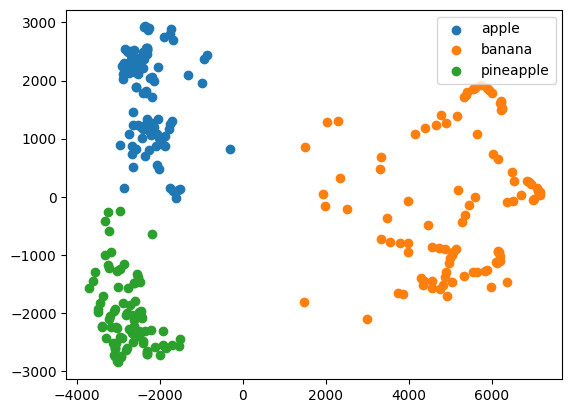

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()